# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [3]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [4]:
import pyprojroot.here as here #here function automatically brings us back to project root folder

## Load Cleaned Data

In [15]:
data = pd.read_csv(here('data/cleaned/cleaned_mbs_reviews.csv'))
data.head(1)

,Unnamed: 0,date_of_stay,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating1,rating2,rating,valid_rating,label,cleaned_review
0,0,Date of stay: August 2023,Erica G,"Sick in Singapore, and MBS staff were amazing!","I was in Singapore on business and, unfortunat...",Trip type: Travelled on business,"Arlington Heights, Illinois",105.0,62.0,5.0,NaN,5.0,True,Positive,sick singapore mbs staff amazing I singapore b...


## Plot overall sentiment pie chart

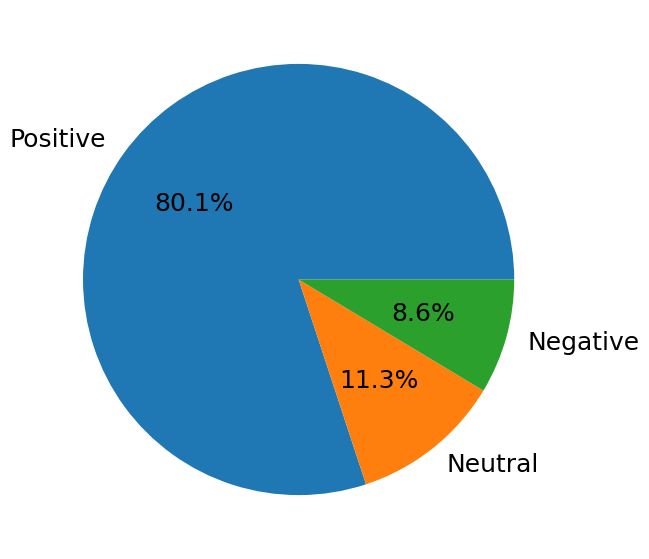

In [16]:
plt.pie(data['label'].value_counts(), labels=data['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Plot Review against Time

In [44]:
timeline = data.groupby('date').count()['traveller_username']

timeline.index = pd.to_datetime(timeline.index)

timeline = timeline.sort_index()

Text(0, 0.5, 'Number of Reviews')

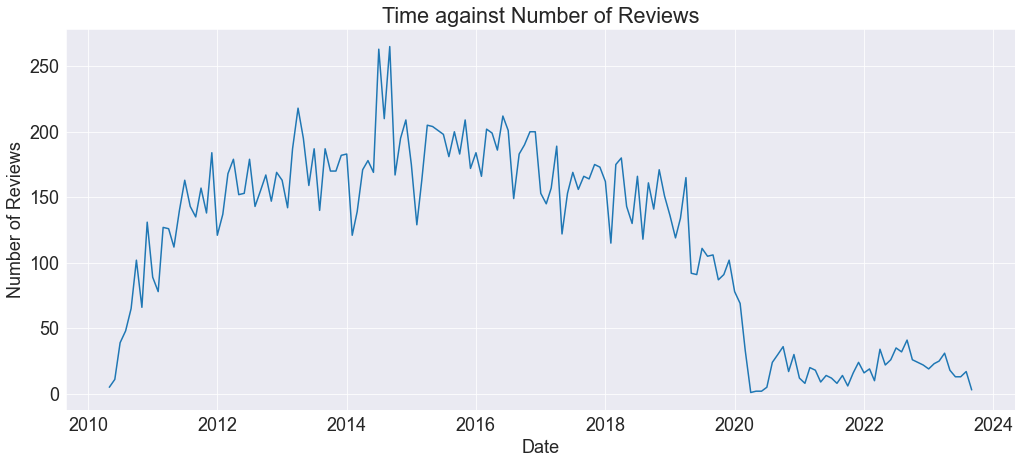

In [46]:
plt.plot(timeline)
plt.title("Time against Number of Reviews")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

## Plot review in Pre, During and Post Covid Time

In [66]:
covid_data = data.dropna(axis=0, subset=['covid'])

covid_data['covid'].value_counts()

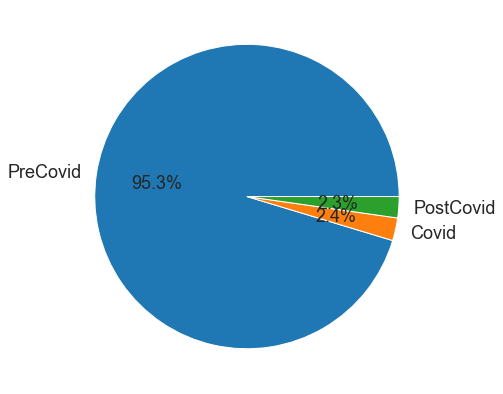

In [68]:
plt.pie(covid_data['covid'].value_counts(), labels=covid_data['covid'].value_counts().index.unique().tolist(), autopct='%1.1f%%')
plt.show()